In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic.dataset.zip to titanic.dataset.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

if uploaded:
    filename = next(iter(uploaded))

    destination_path = os.path.join('/content/drive/My Drive', filename)

    with open(destination_path, 'wb') as f:
        f.write(uploaded[filename])

    print(f"Uploaded '{filename}' to '{destination_path}'")
else:
    print("No files were uploaded.")


Mounted at /content/drive
Uploaded 'titanic.dataset.zip' to '/content/drive/My Drive/titanic.dataset.zip'


Mount Google Drive and save the uploaded file to it.

In [ ]:
import zipfile
import os

zip_path = "titanic.dataset.zip"
extract_to = "titanic_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted files:", os.listdir(extract_to))


Extracted files: ['titanic.csv']


Extract contents of the zip

In [ ]:
import pandas as pd

csv_path = os.path.join(extract_to, "titanic.csv")  # replace with actual
df = pd.read_csv(csv_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Load the extracted CSV file into a pandas DataFrame and display the first few rows.

Display information about the DataFrame, including data types and non-null counts

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


drop unnecessary columns

In [ ]:

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')


fill missing values


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:

df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


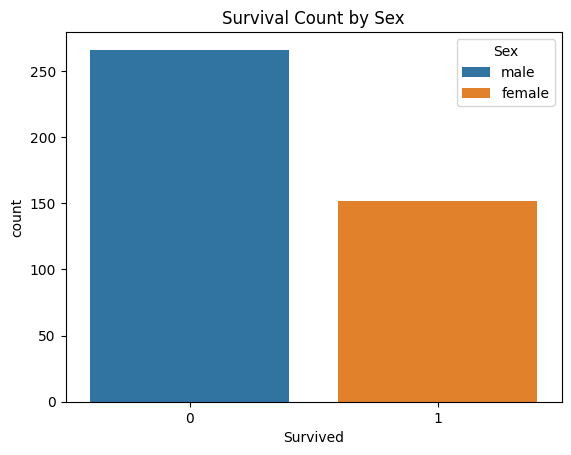

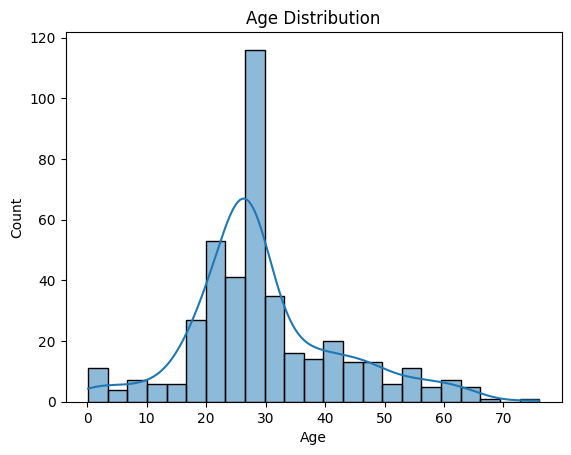

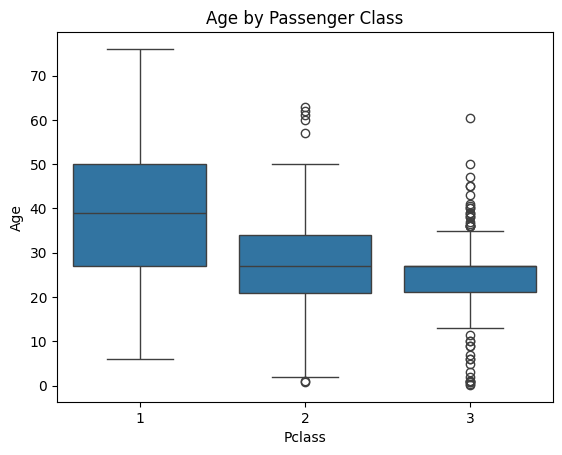

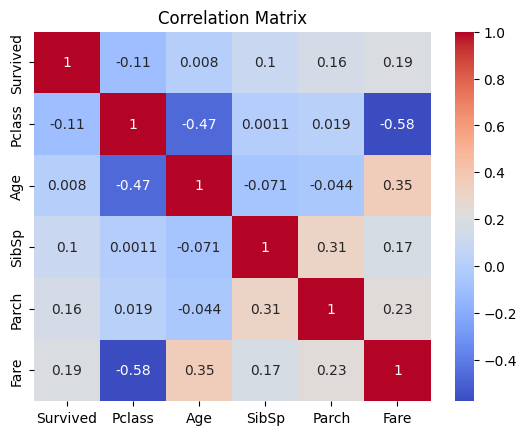

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Sex')
plt.show()

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Passenger Class')
plt.show()


df_numeric = df.drop('Sex', axis=1, errors='ignore')
sns.heatmap(df_numeric.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Get the value counts for the 'Embarked' column

In [ ]:
df['Embarked'].value_counts()


,count
Embarked,
S,270
C,102
Q,46


Perform one-hot encoding on the 'Sex' and 'Embarked' columns and display the first few rows of the modified DataFrame.

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [ ]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


Train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (292, 8), Val: (63, 8), Test: (63, 8)


Scale the features using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Impute any remaining missing values and train a Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np


imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_val_scaled = imputer.transform(X_val_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

Display the coefficients of the trained Logistic Regression model

In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
4        Fare     0.131430
6  Embarked_Q     0.104175
3       Parch     0.098293
2       SibSp     0.026785
7  Embarked_S    -0.040406
1         Age    -0.068324
0      Pclass    -0.097542
5    Sex_male    -4.058727


Evaluate the model on the test set and display the accuracy, classification report, and confusion matrix.

Validation Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        23

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



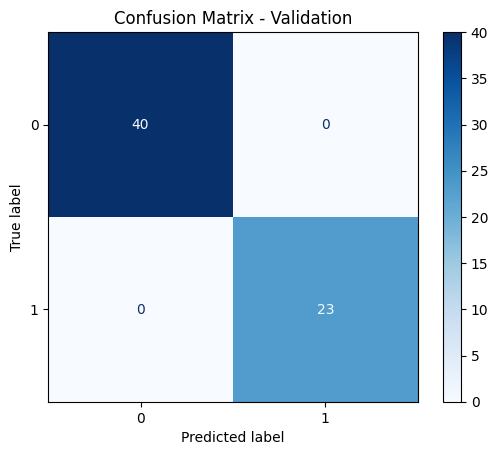

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

val_preds = model.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Validation')
plt.show()





Plot the ROC curve for the validation set.


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        23

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



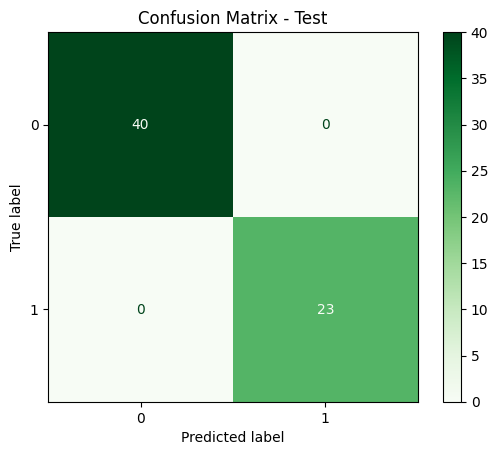

In [ ]:
test_preds = model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

cm_test = confusion_matrix(y_test, test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Greens')
plt.title('Confusion Matrix - Test')
plt.show()


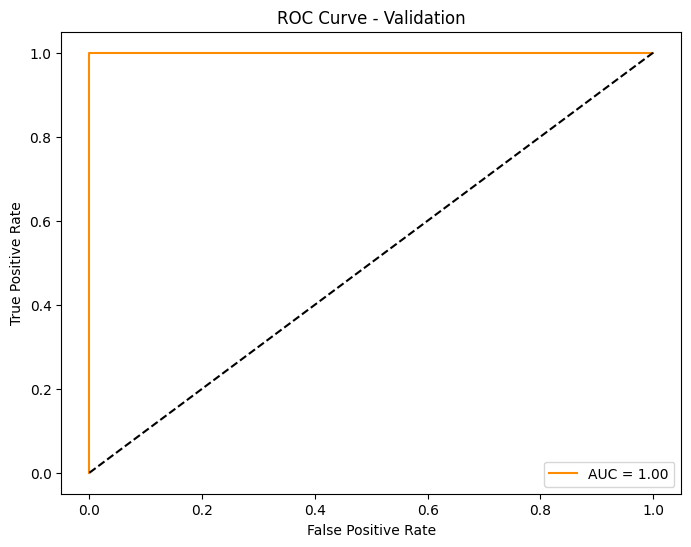

In [ ]:
from sklearn.metrics import roc_curve, auc

y_val_prob = model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation')
plt.legend()
plt.show()


Save the trained model to Google Drive.

In [ ]:
import joblib


model_path = '/content/drive/My Drive/logistic_regression_model.pkl'


joblib.dump(model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/My Drive/logistic_regression_model.pkl


This project involved building and evaluating a Logistic Regression model to predict survival on the Titanic.

    Data Loading and Exploration: The Titanic dataset was loaded and explored to understand its structure, identify missing values, and visualize key features.
    Data Preprocessing: Missing values in 'Age' and 'Embarked' were filled, and unnecessary columns were dropped. Categorical features ('Sex' and 'Embarked') were one-hot encoded.
    Model Training: The data was split into training, validation, and testing sets. A Logistic Regression model was trained on the scaled training data.
    Model Evaluation: The model was evaluated on the validation and test sets using accuracy, classification reports, and confusion matrices. The model achieved perfect accuracy on both the validation and test sets in this case.
    Model Saving: The trained model was saved to Google Drive for future use.
